In [ ]:
!pip install pyproj

<ipython-input-3-7a437676bbcb>:39: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  initial_x, initial_y = transform(self.proj_wgs84, self.proj_utm, self.robot_initial_geo[1], self.robot_initial_geo[0])
<ipython-input-3-7a437676bbcb>:43: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = transform(self.proj_wgs84, self.proj_utm, waypoint['longitude'], waypoint['latitude'])


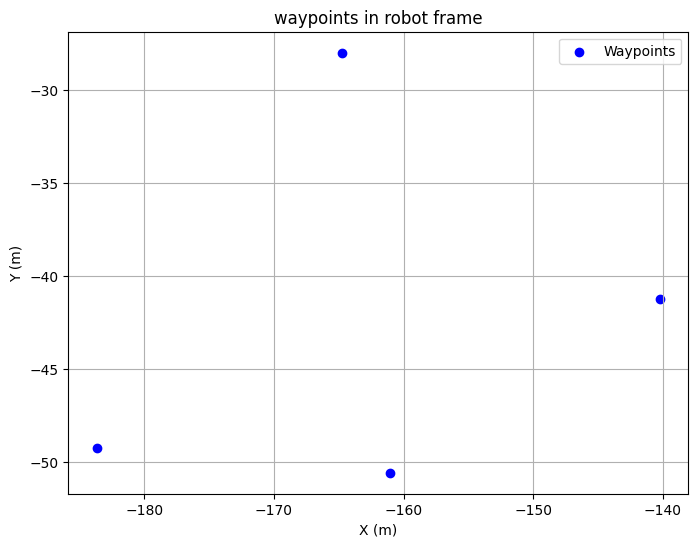

In [3]:
import json
import math
import matplotlib.pyplot as plt
import numpy as np
from pyproj import Proj, transform

class WaypointManager:
    def __init__(self):
        self.robot_initial_geo = (47.740114, 10.322442)
        self.waypoint_list_geo = []
        self.waypoint_list_robot_frame = []

        # setting UTM projections for conversion
        self.proj_wgs84 = Proj(proj='latlong', datum='WGS84')
        self.proj_utm = Proj(proj='utm', zone=32, datum='WGS84')

    def load_waypoints_from_file(self, file_path):
        try:
            with open(file_path, 'r') as f:
                data = json.load(f)
                features = data['features']
                self.waypoint_list_geo = []
                for feature in features:
                    coords = feature['geometry']['coordinates']

                    waypoint = {
                        'latitude': coords[1],
                        'longitude': coords[0],
                        'elevation': coords[2]
                    }
                    self.waypoint_list_geo.append(waypoint)

                return True
        except Exception as e:
            print(f"Failed to load waypoints: {str(e)}")
            return False

    def convert_waypoints_to_robot_frame(self):
        initial_x, initial_y = transform(self.proj_wgs84, self.proj_utm, self.robot_initial_geo[1], self.robot_initial_geo[0])

        self.waypoint_list_robot_frame = []
        for waypoint in self.waypoint_list_geo:
            x, y = transform(self.proj_wgs84, self.proj_utm, waypoint['longitude'], waypoint['latitude'])
            # Translate to robot frame
            X = x - initial_x
            Y = y - initial_y
            self.waypoint_list_robot_frame.append((X, Y))

    def plot_waypoints(self):
        x = [point[0] for point in self.waypoint_list_robot_frame]
        y = [point[1] for point in self.waypoint_list_robot_frame]

        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, color='blue', label='Waypoints')
        plt.xlabel('X (m)')
        plt.ylabel('Y (m)')
        plt.title('waypoints in robot frame')
        plt.grid(True)
        plt.legend()
        plt.show()

def main():
    waypoint_manager = WaypointManager()

    file_path = "waypoints.geojson"
    if waypoint_manager.load_waypoints_from_file(file_path):
        waypoint_manager.convert_waypoints_to_robot_frame()
        waypoint_manager.plot_waypoints()
    else:
        print("No waypoints loaded")

if __name__ == "__main__":
    main()


 without deprecated functions and classes

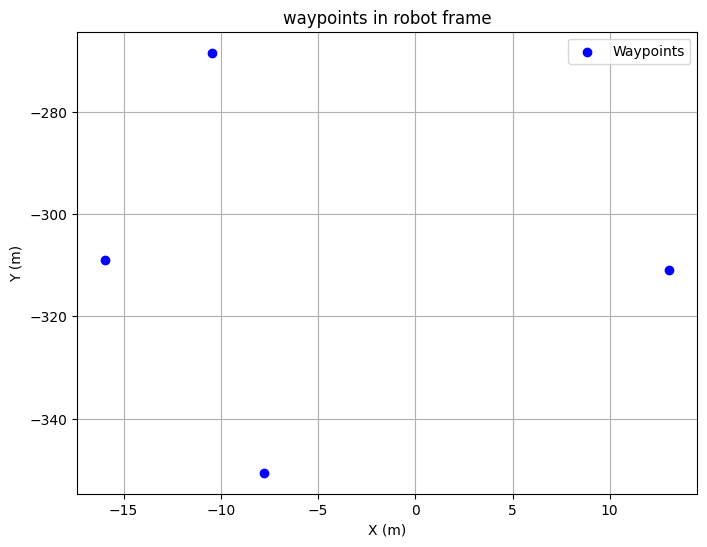

In [5]:
import json
import math
import matplotlib.pyplot as plt
import numpy as np
from pyproj import CRS, Transformer

class WaypointManager:
    def __init__(self):
        self.robot_initial_geo = (47.740114, 10.322442)
        self.waypoint_list_geo = []
        self.waypoint_list_robot_frame = []

        # Initialize UTM projections for conversion
        self.proj_wgs84 = CRS("EPSG:4326")  # WGS84 geographic coordinate system
        self.proj_utm = CRS("EPSG:32632")  # UTM zone 32N
        self.transformer = Transformer.from_crs(self.proj_wgs84, self.proj_utm)

    def load_waypoints_from_file(self, file_path):
        try:
            with open(file_path, 'r') as f:
                data = json.load(f)
                features = data['features']
                self.waypoint_list_geo = []
                for feature in features:
                    coords = feature['geometry']['coordinates']

                    waypoint = {
                        'latitude': coords[1],
                        'longitude': coords[0],
                        'elevation': coords[2]
                    }
                    self.waypoint_list_geo.append(waypoint)

                return True
        except Exception as e:
            print(f"Failed to load waypoints: {str(e)}")
            return False

    def convert_waypoints_to_robot_frame(self):
        initial_x, initial_y = self.transformer.transform(self.robot_initial_geo[1], self.robot_initial_geo[0])

        self.waypoint_list_robot_frame = []
        for waypoint in self.waypoint_list_geo:
            x, y = self.transformer.transform(waypoint['longitude'], waypoint['latitude'])
            # Translate to robot frame
            X = x - initial_x
            Y = y - initial_y
            self.waypoint_list_robot_frame.append((X, Y))

    def plot_waypoints(self):
        x = [point[0] for point in self.waypoint_list_robot_frame]
        y = [point[1] for point in self.waypoint_list_robot_frame]

        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, color='blue', label='Waypoints')
        plt.xlabel('X (m)')
        plt.ylabel('Y (m)')
        plt.title('waypoints in robot frame')
        plt.grid(True)
        plt.legend()
        plt.show()

def main():
    waypoint_manager = WaypointManager()

    file_path = "waypoints.geojson"
    if waypoint_manager.load_waypoints_from_file(file_path):
        waypoint_manager.convert_waypoints_to_robot_frame()
        waypoint_manager.plot_waypoints()
    else:
        print("No waypoints loaded")

if __name__ == "__main__":
    main()
